$\Huge \rm{AS4501}$

$\Huge \rm{Bayesian\ inference}$

Francisco Förster

# Bayes rule

$\Large \begin{align}
P(D , \theta| M) &= P(D | \theta, M) P(\theta | M) \\
&= P(\theta | D, M) P(D | M)
\end{align} $

This implies

$\Large P(\theta | D, M) = \frac{P(D | \theta, M) P(\theta | M)}{P(D | M)}$

The terms are called as follows:


* The **posterior**: $P(\theta | D, M)$

* The **likelihood**: $P(D | \theta, M)$

* The **prior**: $P(\theta | M)$

* The **evidence**: $P(D | M)$

The evidence is usually assumed to be some normalization constant, independent of $\theta$, but it has some applications.








This means that we have a way of computing the probability of the model parameters given some model, the data and some prior information

# The posterior distribution

The posterior summarizes everything we know about the parameters given the data, including possible correlations between variables 

It is usually represented by a **corner plot** of the parameters $\theta$

Model example

![](spec.jpg)

Corner plot 

![](corner.png)

Another example 
![](corner2.png)

## The Maximum a Posteriori (MAP)

The **Maximum a Posteriori (MAP)** corresponds to the solution which maximizes the posterior.


![](MAP.png)



* Reporting the posterior is the best we can do

* The problems start when we have too many dimensions (the curse of dimensionality)

* Then, sampling the model parameters can become very expensive computationally

* To solve this problem, different **sampling** algorithms have been developed

# Posterior sampling

## One-dimensonal case: use the cumulative distribution function (cdf)

![](cdf.png)

## Use rejection sampling

![](rejectionsampling.png)

### Basic idea:


1. Create a **proposal distribution $q(x)$** that satisfies $M q(x) \ge \tilde{p}(x)$, where M is some constant and $\tilde{p}(x)$ is the **target distribution**, some unnormalized version of $p(x)$. $M q(x)$ provides an upper envelope for $\tilde{p}$

2. Sample $x \sim q(x)$, which corresponds to picking a random $x$ location under the envelope, and then we sample $u \sim U(0, 1)$, which corresponds to picking a random heigtht.

3. If $u > \frac{\tilde{p}(x)}{M q(x)}$, reject the sample, otherwise accept it

Let's define:

$ \Large S = \lbrace (x, u): u \le \tilde{p}(x)/M q(x) \rbrace$

and 

$ \Large S_0 = \lbrace (x, u): x \le x_0, u \le \tilde{p}(x) / M q(x) \rbrace$



The cdf of the accepted points is given by:

$\Large \begin{align}
P(x \le x_0 | x~\rm{accepted}) &= \frac{P(x \le x_0, x~\rm{accepted})}{P(x~\rm{accepted})} \\
 &= \frac{\int \int \mathbb{I}((x, u) \in S_0) q(x) du dx}{\int \int  \mathbb{I}((x, u) \in S) q(x) du dx} 
 = \frac{\int\limits_{-\inf}^{x_0} \tilde{p}(x) dx}{\int\limits_{-\inf}^{\inf} \tilde{p}(x) dx}
\end{align}$

Which is the cdf of $p(x)$




How efficient is this?

The probability of acceptance is:

$\Large p({\rm accept}) = \int \frac{\tilde{p}(x)}{M q(x)} q(x) dx = \frac{1}{M} \int \tilde{p}(x)$


So, we want to choose $M$ to be as small as possible.


### Application to Bayesian statistics (Smith & Gelfand 1992):

Suppose we want to draw unweighted samples from the posterior;

$\Large p(\theta | D) = \frac{p(D | \theta) p(\theta)}{P(D)}$.

We can use rejection sampling with the following target distribution:

$\Large \tilde{p}(\theta) = p(D | \theta) p(\theta)$,

the following proposal distribution:

$\Large q(\theta) = p(\theta)$

and 

$\Large M = p(D | \hat{\theta})$,

where $\hat{\theta} = arg \max(p(D | \theta))$,

the maximum likelihood estimator of $\theta$.

Then, we accept points with probability

$\Large \frac{\tilde{p}(\theta)}{M q(\theta)} = \frac{p(D|\theta) p(\theta)}{p(D | \hat{\theta}) p (\theta)} = \frac{p(D|\theta)}{p(D | \hat{\theta})}$

Thus, samples from the prior that have high likelihood are more likely to be retained in the posterior. 

However, if there is a big mismatch between prior and posterior this procedure is very inefficient. This is usually the case in high dimensions!

For example, consider sampling from $p(x) = N(\mathbf{0}, \sigma_p^2 \mathbf{I})$ using a proposal $q(x) = N(\mathbf{0}, \sigma_q^2 \mathbf{I})$. We must have $\sigma_q \ge \sigma_p$ for the upper bound. In D dimensions, the optimal values is given by $M = (\sigma_q / sigma_p)^D$. If the acceptance ration is $\frac{1}{M}$ and $\sigma_q$ exceeds $\sigma_p$ by just 1%, then in 1000 dimensions the acceptance ration would be about 1/20,000! 





## Markov Chain Monte Carlo (MCMC) sampling

* Family of methods to sample distributions in high dimensions

* Among top 10 most important algorithms of the century!

* **Basic idea**:

    * Construct a Markov chain (sequence of values where the next value $i+1$ depends only on the present value $i$) on the state space whose stationary distribution is the target density $p^*(x)$
    
    * That is, we perform a random walk on the state space in such a way that the fraction of time we spend in each state $x$ is proportional to $p^*(x)$.
    
    * By drawing correlated samples $x_0, x_1, x_2$ from the chain, we can perform Monte Carlo integration w.r.t. $p^*$

## Gibbs sampling

* One of the most popular MCMC algorithm

* **Basic  idea**:
    
    * we sample each variable in turn, conditioned on the values of all the other variables in the distribution
        
    * given a joint sample $x^s$ of all the variables, we generate a new sample $x^{s+1}$ by sampling each component in turn, based on the most recent values of the variables, e.g. for 3 dimensions:
    
        * $x_1^{s+1} \sim p(x_1 | x_2^s, x_3^s)$
        * $x_2^{s+1} \sim p(x_2 | x_1^s, x_3^s)$
        * $x_3^{s+1} \sim p(x_3 | x_1^s, x_2^s)$
        
    * The expression $p(x_i | x_{-i})$ is called the **full conditional** for variable $i$
    
    * It is usually necessary to discard some of the initial samples until the Markov Chain has **burned in**.






![](gibbs.jpg)

Gibbs sampling is useful when the joint distribution is not known, but the conditional distributions are known.

Target mu = [ 1. -2.]
Empirical mean (post burn-in) = [ 0.97165501 -2.01464621]

Target Sigma =
 [[4.  1.6]
 [1.6 1. ]]
Empirical covariance (post burn-in) =
 [[3.87380068 1.53412144]
 [1.53412144 0.962768  ]]


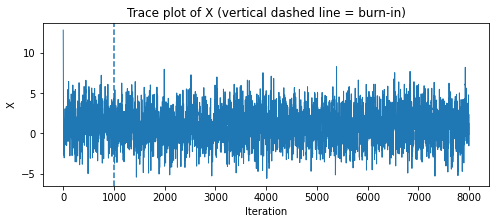

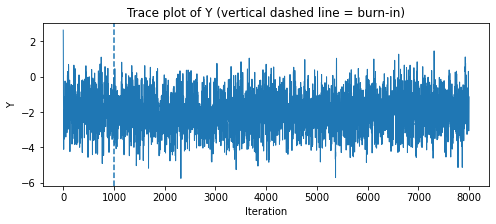

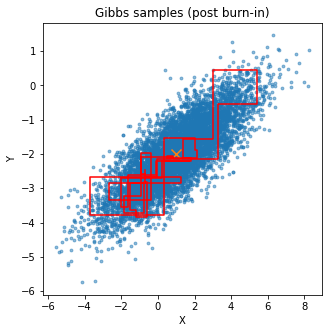

In [40]:
# Gibbs sampling demo for a bivariate normal target
# Target: (X, Y) ~ N(mu, Sigma) with easy conditional normals
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# ----- Target distribution parameters -----
mu = np.array([1.0, -2.0])
rho = 0.8
sigma_x = 2.0
sigma_y = 1.0
Sigma = np.array([
    [sigma_x**2, rho * sigma_x * sigma_y],
    [rho * sigma_x * sigma_y, sigma_y**2]
])

# Useful precomputations for conditionals
# X | Y=y  ~ N( mu_x + rho*(sigma_x/sigma_y)*(y - mu_y),  (1 - rho^2)*sigma_x^2 )
# Y | X=x  ~ N( mu_y + rho*(sigma_y/sigma_x)*(x - mu_x),  (1 - rho^2)*sigma_y^2 )
mu_x, mu_y = mu
cond_var_x = (1 - rho**2) * sigma_x**2
cond_var_y = (1 - rho**2) * sigma_y**2
cond_sd_x = np.sqrt(cond_var_x)
cond_sd_y = np.sqrt(cond_var_y)

def sample_x_given_y(y):
    mean = mu_x + rho * (sigma_x / sigma_y) * (y - mu_y)
    return np.random.normal(mean, cond_sd_x)

def sample_y_given_x(x):
    mean = mu_y + rho * (sigma_y / sigma_x) * (x - mu_x)
    return np.random.normal(mean, cond_sd_y)

# ----- Gibbs sampler -----
num_samples = 8000
burn_in = 1000

xs = np.zeros(num_samples)
ys = np.zeros(num_samples)

# initialize at an arbitrary point (far from the mean on purpose)
x_curr, y_curr = -6.0, 5.0

for t in range(num_samples):
    # sample X | Y
    x_curr = sample_x_given_y(y_curr)
    # sample Y | X
    y_curr = sample_y_given_x(x_curr)
    xs[t] = x_curr
    ys[t] = y_curr

# Discard burn-in
xs_b = xs[burn_in:]
ys_b = ys[burn_in:]

# ----- Diagnostics -----
emp_mean = np.array([xs_b.mean(), ys_b.mean()])
emp_cov = np.cov(np.vstack([xs_b, ys_b]))

print("Target mu =", mu)
print("Empirical mean (post burn-in) =", emp_mean)
print("\nTarget Sigma =\n", Sigma)
print("Empirical covariance (post burn-in) =\n", emp_cov)

# ----- Plots -----
# 1) Trace of X
plt.figure(figsize=(8, 3))
plt.plot(xs, linewidth=1)
plt.axvline(burn_in, linestyle="--")
plt.title("Trace plot of X (vertical dashed line = burn-in)")
plt.xlabel("Iteration")
plt.ylabel("X")
plt.show()

# 2) Trace of Y
plt.figure(figsize=(8, 3))
plt.plot(ys, linewidth=1)
plt.axvline(burn_in, linestyle="--")
plt.title("Trace plot of Y (vertical dashed line = burn-in)")
plt.xlabel("Iteration")
plt.ylabel("Y")
plt.show()

# 3) Scatter of samples vs. true mean (post burn-in)
plt.figure(figsize=(5, 5))
npt = 30
plt.plot(np.array(list(zip(xs_b[:npt], xs_b[1:npt+1]))).flatten()[1:],
np.array(list(zip(ys_b[:npt], ys_b[1:npt+1]))).flatten()[:-1], c='r')
plt.scatter(xs_b[:], ys_b[:], s=8, alpha=0.5)  # thinning for visibility
plt.scatter([mu_x], [mu_y], marker="x", s=100)     # true mean
plt.title("Gibbs samples (post burn-in)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


## Metropolis-Hastings algorithm

* The Models where we can compute the full conditional probability are limited

* Even when this exists, Gibbs sampling can be quite slow

* More general algorithm is the **Metropolis Hastings (MH)** algorithm.

* **Basic idea**:

    * at each step, we propose to move from the current state $x$ to a new state $x'$ with probability $q(x'|x)$, where $q$ is called the **proposal distribution** or **kernel**.
    
    * the user is free to use any kind of proposal they want, subject to some conditions
    
    * Commonly used proposal: symmetric Gaussian distribution centered on the current state: $q(x'|x) = N(x'|x, \Sigma)$; which is called a **random walk MH**
    
    * if we use a proposal of the form $q(x'|x) = q(x')$, the new state is independent of the old state, and the method is known as **independence sampler**.
    
    * having proposed $x'$, we then decide to accept or reject it according to some formula, which ensures that the fraction of time spent in each state is proportional to $p^*(x)$
    
    * if the proposal is accepted, the new state is $x'$, otherwise the state remains the same.
    
    * if the proposal is symmetric, i.e. $q(x'|x) = q(x | x')$ the acceptance probability is given by the following formula:
    
        * $r = \min (1, \frac{p^*(x')}{p^*(x)})$
        
        * i.e. we always move to $x'$ if it is more probable than $x$, otherwise we move there with some probability.
        
    * **It can be shown that this procedure ensures that the fraction of time we spend in each state $x$ is proportional to $p^*(x)$.**
    
    * Note that if the proposal is asymmetric, so $q(x'|x) \ne q(x|x')$, we need the **Hasting correction**:
    
        * $r = \min(1, \alpha)$
        
        * $\alpha = \frac{p^*(x') q(x|x')}{p^*(x) q(x'|x)} = \frac{p^*(x')/q(x'|x)}{p^*(x) / q(x|x')}$
        
* An important reason why MH is useful is that, when evaluating for $\alpha$, we only need to know the target density up to a normalization constant (which gets canceled in the formula above)
      




![](MH.png)

![](3dRosenbrock.png)

Acceptance rate: 0.659
Posterior mean (by MC): -0.0069,  variance: 0.3352


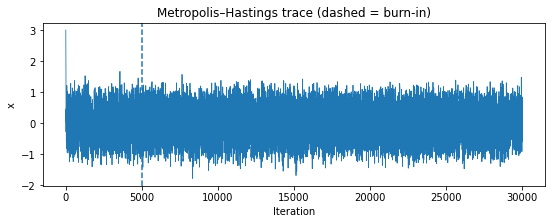

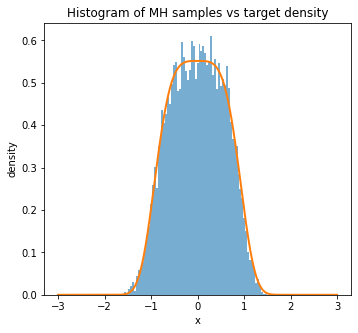

In [41]:
# Metropolis–Hastings sampler demo for target π(x) ∝ exp(-x^4)
# We use a Gaussian random-walk proposal and visualize trace + histogram vs. the normalized target.
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(7)

def log_unnorm_pi(x):
    # log π(x) up to additive constant
    return -x**4

def mh_sampler(n_samples=20000, burn_in=2000, init=0.0, proposal_sd=1.0):
    x = init
    samples = np.zeros(n_samples)
    accepts = 0
    for t in range(n_samples):
        # Propose x' ~ N(x, proposal_sd^2)
        x_prop = np.random.normal(x, proposal_sd)
        # MH ratio in log space for stability
        log_alpha = log_unnorm_pi(x_prop) - log_unnorm_pi(x)
        if np.log(np.random.rand()) < log_alpha:
            x = x_prop
            accepts += 1
        samples[t] = x
    acc_rate = accepts / n_samples
    return samples[burn_in:], acc_rate, samples

# Run the sampler
post_burn, acc_rate, full_chain = mh_sampler(n_samples=30000, burn_in=5000, init=3.0, proposal_sd=0.8)

print(f"Acceptance rate: {acc_rate:.3f}")
print(f"Posterior mean (by MC): {post_burn.mean():.4f},  variance: {post_burn.var():.4f}")

# ----- Build a normalized reference curve numerically -----
xs = np.linspace(-3, 3, 1000)
unnorm = np.exp(-xs**4)
Z = np.trapz(unnorm, xs)  # numerical normalization constant
target_pdf = unnorm / Z

# ----- Trace plot -----
plt.figure(figsize=(9, 3))
plt.plot(full_chain, linewidth=0.8)
plt.axvline(5000, linestyle="--")
plt.title("Metropolis–Hastings trace (dashed = burn-in)")
plt.xlabel("Iteration")
plt.ylabel("x")
plt.show()

# ----- Histogram vs normalized target density -----
plt.figure(figsize=(5.5, 5))
# Histogram of samples (density=True) with many bins
plt.hist(post_burn, bins=80, density=True, alpha=0.6)
# Overlay normalized target
plt.plot(xs, target_pdf, linewidth=2)
plt.title("Histogram of MH samples vs target density")
plt.xlabel("x")
plt.ylabel("density")
plt.show()


## PyMC https://docs.pymc.io/

![](MCMC.png)

![](MCMC2.png)

![](MCMC3.png)

![](MCMC4.png)

# Affine invariant MCMC

Method popularized by the **emcee** code http://dfm.io/emcee/current/

Paper from Goodman & Weare in here: https://msp.org/camcos/2010/5-1/camcos-v5-n1-p04-p.pdf


**Basic idea**:
    
* The method has many **parallel walkers**, each sampling from the distribution

* the walkers are only allowed to do linear combinations of their solutions, which simplifies significantly the theoretical derivation (**stretch move**)

* usually much faster than MH

* Proposal of the form $x_k(t) \rightarrow Y = x_j + z(x_k(t) - x_j)$

* If Z satisfies the symmetry condition: $g(\frac{1}{z}) = z g(z)$, then the move is symmetric in the sense that: $p(x_k(t) \rightarrow Y) = p(y \rightarrow x_k(t))$

![](stretch.png)

* the particular distribution used is the  following:

## $g(z)=  \begin{cases} \frac{1}{\sqrt{z}} & \text{if} z \in [\frac{1}{a}, a] \\ 0, & \text{otherwise} \end{cases}$

where the parameter $a > 1$ can be adjusted to improve performance


![](stretch2.png)

Example using SN data from the HiTS survey (Förster et al. 2016) fitted to hydrodynamical models from Moriya et al. 2018

![](evol15X.png)

![](corner15X.png)

![](models15X.png)

Posterior mean for mu: -0.175 ± 0.100
Median and 68% CI: -0.175 [-0.275, -0.074]
Mean acceptance fraction: 0.8049062499999999
Estimated IAT (steps per effective sample): [26.60144889]
Approx. effective samples for mu: 4812


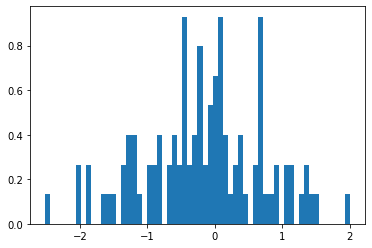

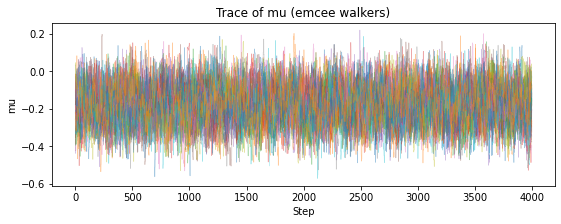

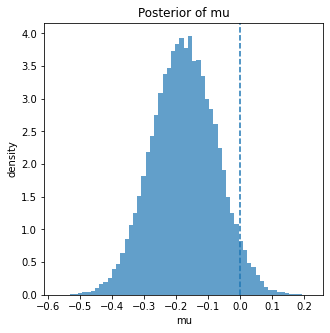

In [48]:
# emcee example: estimate mu with known sigma=1 and Uniform(-5,5) prior
import numpy as np
import emcee
import matplotlib.pyplot as plt

# -----------------------
# 1) Generate synthetic data
# -----------------------
rng = np.random.default_rng(7)
N = 100
true_mu, sigma = 0.0, 1.0
x = rng.normal(loc=true_mu, scale=sigma, size=N)
plt.hist(x, bins=60, density=True)


# -----------------------
# 2) Define log-prior, log-likelihood, log-posterior
# -----------------------
def log_prior(theta):
    mu, = theta
    # Uniform(-5, 5)
    if -5.0 <= mu <= 5.0:
        return -np.log(10.0)  # log(1/10)
    return -np.inf

def log_likelihood(theta, data):
    mu, = theta
    # Gaussian with known sigma
    resid = data - mu
    return -0.5 * np.sum((resid / sigma) ** 2) - len(data) * np.log(np.sqrt(2*np.pi) * sigma)

def log_posterior(theta, data):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, data)

# -----------------------
# 3) Initialize walkers
# -----------------------
ndim = 1
nwalkers = 32
init_center = np.array([x.mean()])   # start near the MLE
init_spread = 0.1
p0 = init_center + init_spread * rng.normal(size=(nwalkers, ndim))

# -----------------------
# 4) Run emcee
# -----------------------
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[x])

nburn = 1000
nsteps = 4000
# burn-in
state = sampler.run_mcmc(p0, nburn, progress=False)
sampler.reset()
# production
sampler.run_mcmc(state, nsteps, progress=False)

# samples shape: (nsteps, nwalkers, ndim)
flat_samples = sampler.get_chain(discard=0, thin=1, flat=True)[:, 0]

# -----------------------
# 5) Summaries
# -----------------------
mean_mu = np.mean(flat_samples)
std_mu = np.std(flat_samples)
q16, q50, q84 = np.quantile(flat_samples, [0.16, 0.50, 0.84])

print(f"Posterior mean for mu: {mean_mu:.3f} ± {std_mu:.3f}")
print(f"Median and 68% CI: {q50:.3f} [{q16:.3f}, {q84:.3f}]")
print("Mean acceptance fraction:", np.mean(sampler.acceptance_fraction))

# Try to report integrated autocorrelation time (IAT) if long enough
try:
    tau = sampler.get_autocorr_time()
    print("Estimated IAT (steps per effective sample):", tau)
    eff_samples = sampler.get_chain().shape[0] * sampler.get_chain().shape[1] / tau[0]
    print(f"Approx. effective samples for mu: {eff_samples:.0f}")
except emcee.autocorr.AutocorrError:
    print("Chain too short to reliably estimate autocorrelation time.")

# -----------------------
# 6) Quick plots (one figure per chart)
# -----------------------

# Trace (all walkers stacked)
chain = sampler.get_chain()    # (nsteps, nwalkers, 1)
plt.figure(figsize=(9, 3))
for w in range(nwalkers):
    plt.plot(chain[:, w, 0], alpha=0.4, linewidth=0.6)
plt.title("Trace of mu (emcee walkers)")
plt.xlabel("Step")
plt.ylabel("mu")
plt.show()

# Posterior histogram
plt.figure(figsize=(5, 5))
plt.hist(flat_samples, bins=60, density=True, alpha=0.7)
plt.axvline(true_mu, linestyle="--")
plt.title("Posterior of mu")
plt.xlabel("mu")
plt.ylabel("density")
plt.show()
